# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. My work includes various plots and graphs , visualizations , feature engineering , ensemble techniques , different ML algorithms with their respective parameter tuning , analysis and trends . Predictions are of 6 weeks of daily sales for 1,115 stores located across Germany.
 The goal is to predict the Sales of a given store on a given day. Model performance is evaluated on the root mean square error(RMSE).

The dataset consists of two csv files: store.csv and train.csv

# **GitHub Link -**

https://github.com/shaikh111-Z/Regression-Capstone-Project.git

# **Problem Statement**


Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [20]:
# Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [21]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Load Dataset
rosman_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression Capstone Project/rosman_data.csv')


<ipython-input-22-d78e3c7151e0>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rosman_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression Capstone Project/rosman_data.csv')


### Dataset First View

In [23]:
# Vizualizing first five rows of data
rosman_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [24]:
# Dataset Rows & Columns count
print('Dataset Rows : {} \nDataset Columns : {}'.format(rosman_df.shape[0],rosman_df.shape[1]))

Dataset Rows : 1017209 
Dataset Columns : 9


### Dataset Information

In [25]:
# Dataset Info
rosman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [26]:
# Dataset Duplicate Value Count
rosman_df[rosman_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


As we can see above that there are no any duplicate data present in the dataset.

#### Missing Values/Null Values

In [27]:
# Missing Values/Null Values Count
rosman_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Also there are no any null values present in the data

<Axes: >

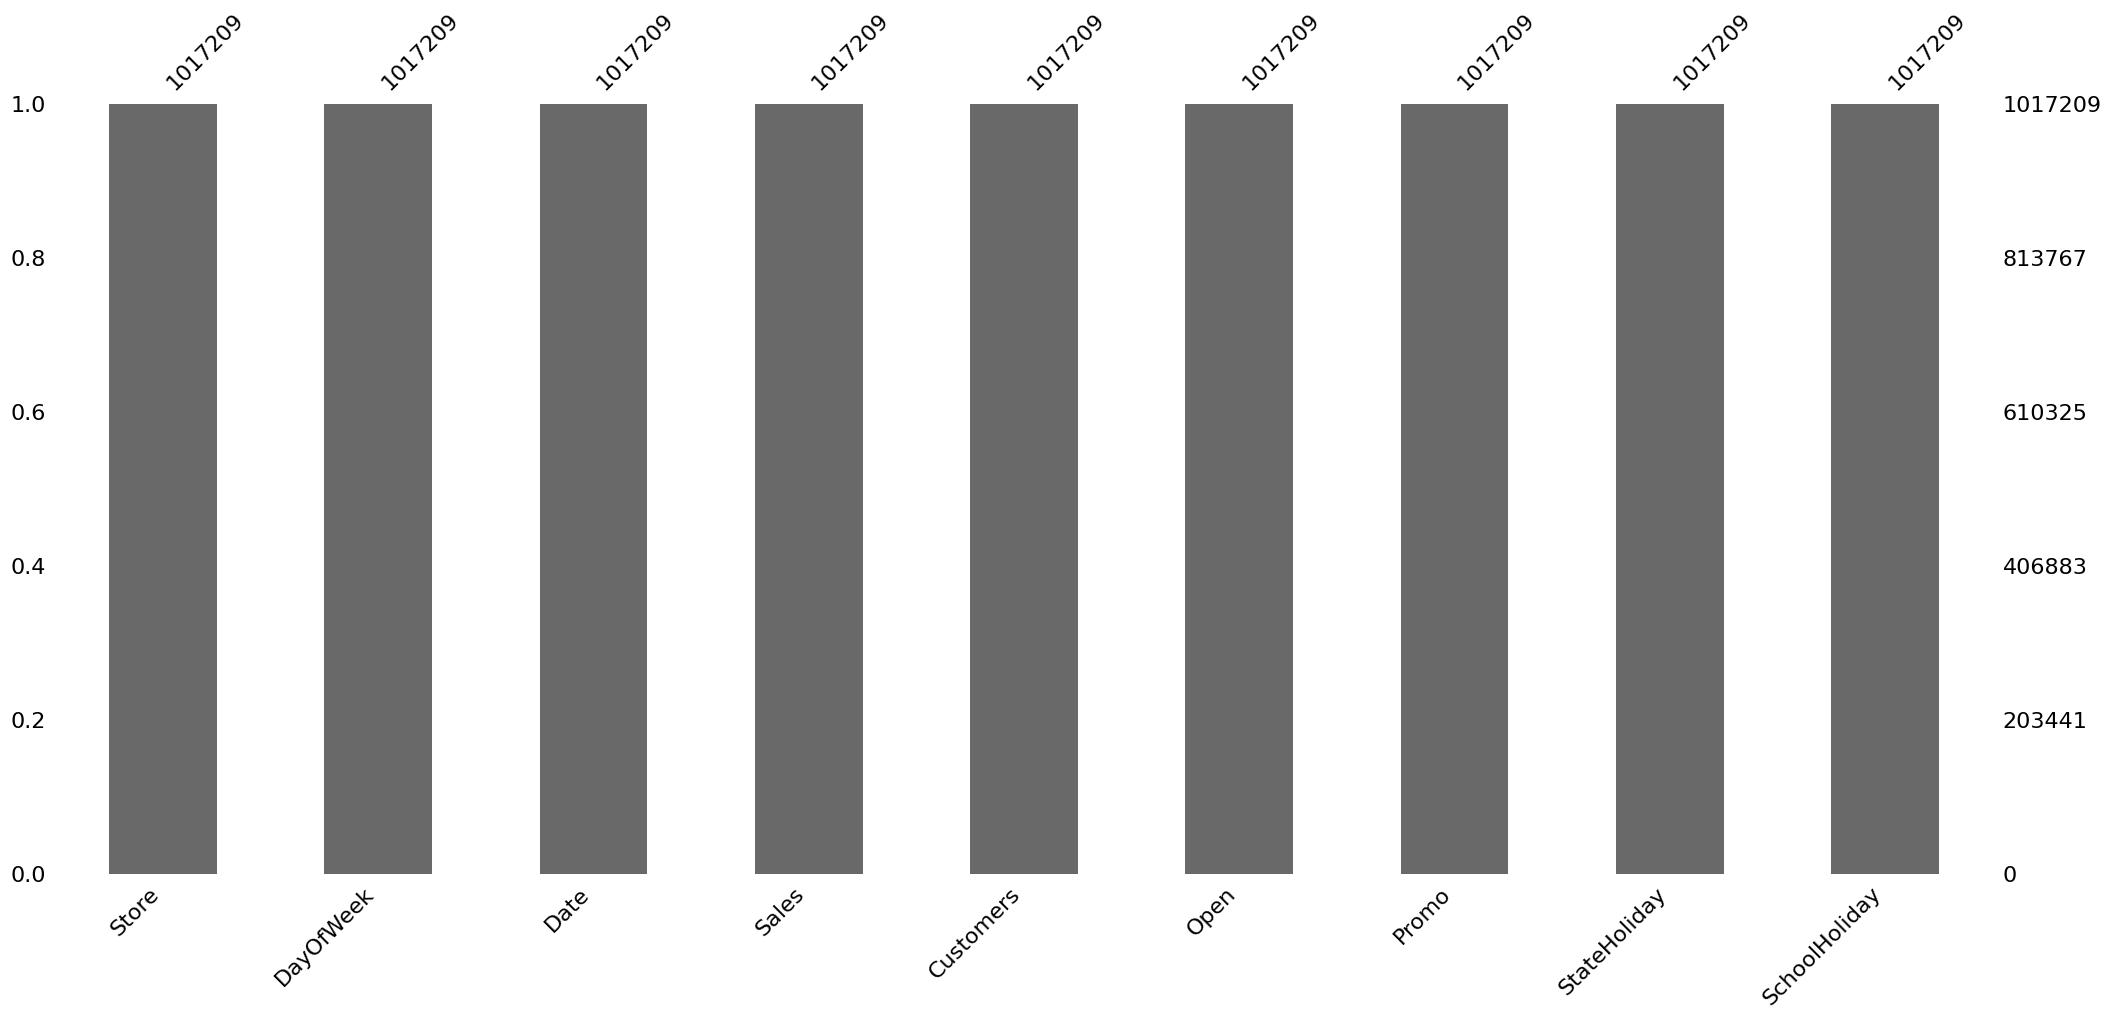

In [28]:
# Visualizing the missing values
import missingno as msno
msno.bar(rosman_df)

## ***2. Understanding Your Variables***

In [29]:
# Dataset Columns
rosman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [30]:
# Dataset Describe
rosman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store








### Check Unique Values for each variable.

In [31]:
# Check Unique Values for each variable.
for col in rosman_df:
    print(rosman_df[col].unique())

[   1    2    3 ... 1113 1114 1115]
[5 4 3 2 1 7 6]
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'
 '2015-05-22' '2015-05-2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# Write your code to make your dataset analysis ready.
print(rosman_df['Date'].min(),'initial')
print(rosman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


This states that, the data we have is from year 2013 to 2015

In [33]:
# extract year, month, day and week of year from "Date"

rosman_df['Date']=pd.to_datetime(rosman_df['Date'])
rosman_df['Year'] = rosman_df['Date'].apply(lambda x: x.year)
rosman_df['Month'] = rosman_df['Date'].apply(lambda x: x.month)
rosman_df['Day'] = rosman_df['Date'].apply(lambda x: x.day)
rosman_df['WeekOfYear'] = rosman_df['Date'].apply(lambda x: x.weekofyear)

In [34]:
rosman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rosman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


### What all manipulations have you done and insights you found?

Using the date feature we created few other features such as Year,month,day and WeekofYear for furthur analysis and better understanding the data

In [35]:
#Now lets load the store dataset
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression Capstone Project/store.csv')

In [36]:
#Vizualizing first five rows of data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Lets check for NaN Values in the dataset

In [37]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. Also CompetitionDistance has only 3 null values. we have to clean those data.

### Imputation of Missing/NaN Values

### 1. CompetitionDistance

In [38]:
store_df[pd.isnull(store_df.CompetitionDistance)]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


The NaN values can be treated in multiple ways depeneding upon the type of variable. They can be replaced with mean, median, mode or 0 as per data observation. Here we decide to fill with median

In [39]:
## code for replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

### 2. Checking for 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear

There are not much information provided to these data. Also we observe from dataset that where the Promo2 has value equals to zero there are Nan values for these columns. That means the store which do not want promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [40]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now we made sure before moving ahead that there are no any missing values present in our data

#### M**erge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.**

In [41]:
# Merging the two datasets
data_new = pd.merge(rosman_df, store_new, on='Store', how='left')
data_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [42]:
data_new.shape

(1017209, 22)

In [43]:
data_new['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

 ### ***Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Normally test using Shapiro-Wilk Test : tests if data is normally distributed

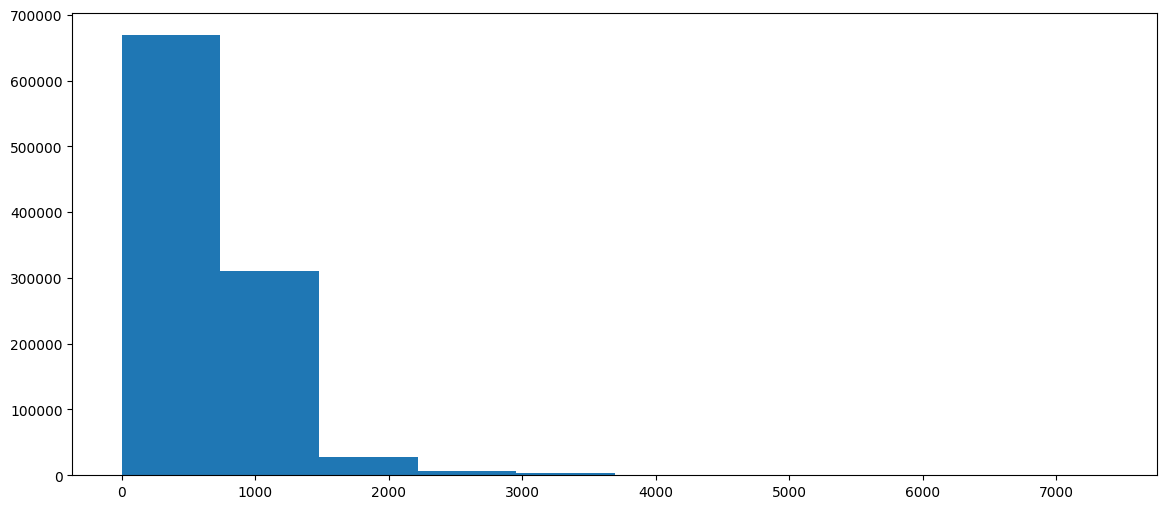

In [28]:
# Checking Histogram
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(data_new['Customers'])
pyplot.show()

In [16]:
from scipy import stats

In [49]:
from scipy.stats import shapiro

datatotest = data_new['Customers']

stat, p = shapiro(datatotest)
print('stat=%.2f, p=%.30f' % (stat,p))

if p > 0.05:
  print("Normally Distributed")
else:
  print("Not normally distributed")

stat=0.62, p=0.000000000000000000000000000000
Not normally distributed


### Label Encoding:

In [27]:
# code for changing StateHoliday dtype from object to int.
data_new.loc[data_new['StateHoliday'] == '0', 'StateHoliday'] = 0
data_new.loc[data_new['StateHoliday'] == 'a', 'StateHoliday'] = 1
data_new.loc[data_new['StateHoliday'] == 'b', 'StateHoliday'] = 2
data_new.loc[data_new['StateHoliday'] == 'c', 'StateHoliday'] = 3
data_new['StateHoliday'] = data_new['StateHoliday'].astype(int, copy=False)



In [28]:
# code for changing Assortment dtype from object to int.
data_new.loc[data_new['Assortment'] == 'a', 'Assortment'] = 0
data_new.loc[data_new['Assortment'] == 'b', 'Assortment'] = 1
data_new.loc[data_new['Assortment'] == 'c', 'Assortment'] = 2
data_new['Assortment'] = data_new['Assortment'].astype(int, copy=False)

In [29]:
# code for changing StoreType dtype from object to int.
data_new.loc[data_new['StoreType'] == 'a', 'StoreType'] = 0
data_new.loc[data_new['StoreType'] == 'b', 'StoreType'] = 1
data_new.loc[data_new['StoreType'] == 'c', 'StoreType'] = 2
data_new.loc[data_new['StoreType'] == 'd', 'StoreType'] = 3
data_new['StoreType'] = data_new['StoreType'].astype(int, copy=False)

In [30]:
data_new['CompetitionOpenSinceYear']= data_new['CompetitionOpenSinceYear'].astype(int)
data_new['Promo2SinceYear']= data_new['Promo2SinceYear'].astype(int)
data_new['CompetitionDistance']= data_new['CompetitionDistance'].astype(int)
data_new['Promo2SinceWeek']= data_new['Promo2SinceWeek'].astype(int)

In [31]:
# code for changing format of date from object to datetime
data_new['Date'] = pd.to_datetime(data_new['Date'], format= '%Y-%m-%d')
data_new['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(data_new['Date']).month

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Count Plot

<Axes: xlabel='DayOfWeek', ylabel='count'>

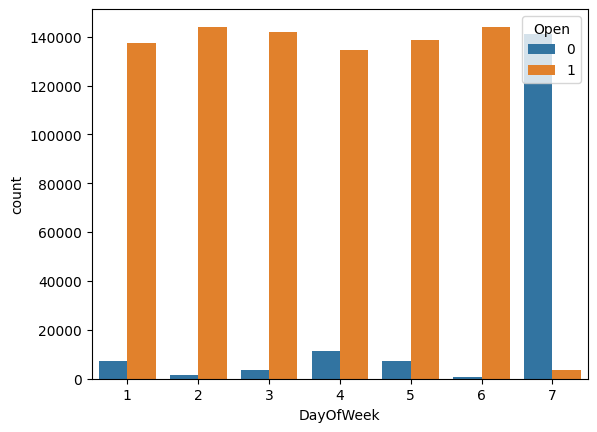

In [33]:
# Chart - 1 visualization code
sns.countplot(x='DayOfWeek',hue='Open',data=data_new)

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation

##### 2. What is/are the insight(s) found from the chart?

As we can see in the graph above that stores mainly remains closed on sunday

#### Chart - 2 Point Plot to Vizualize sales

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

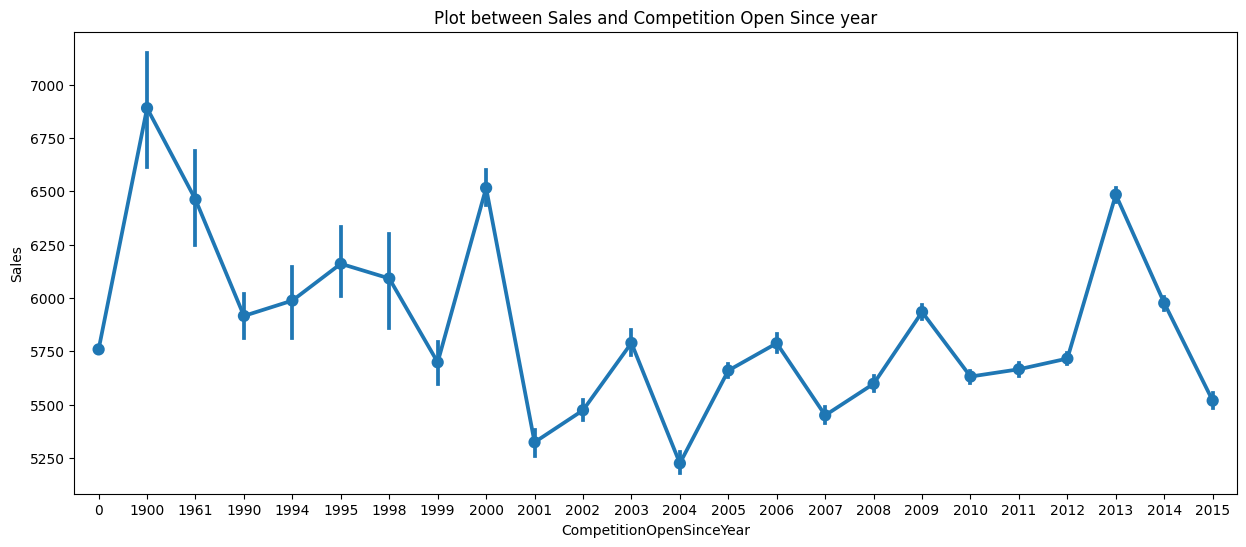

In [34]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=data_new)
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication

##### 2. What is/are the insight(s) found from the chart?

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

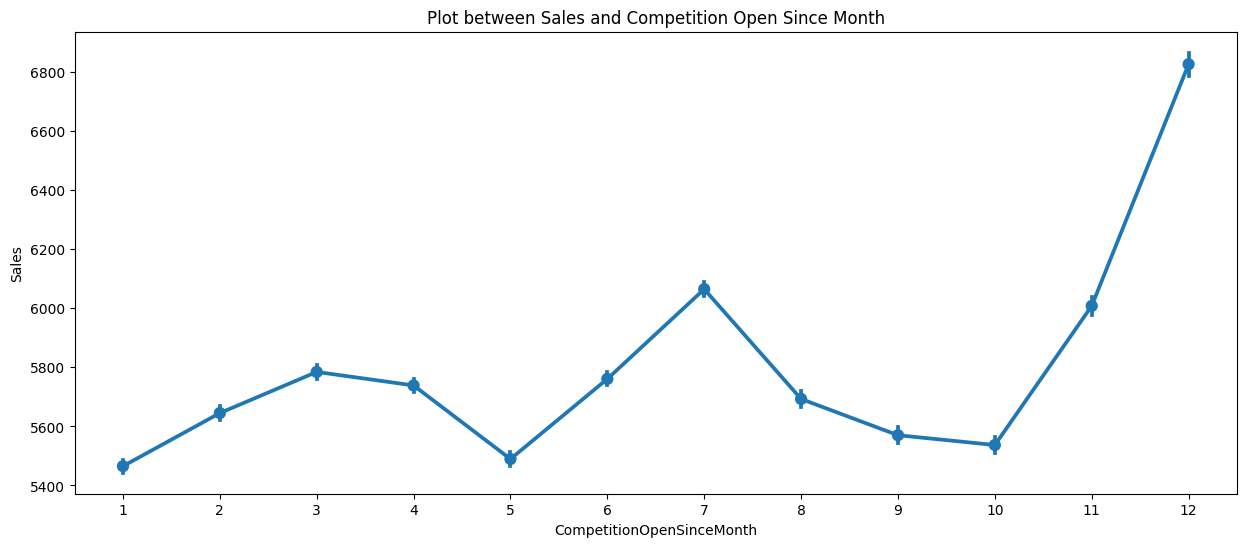

In [35]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=data_new)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

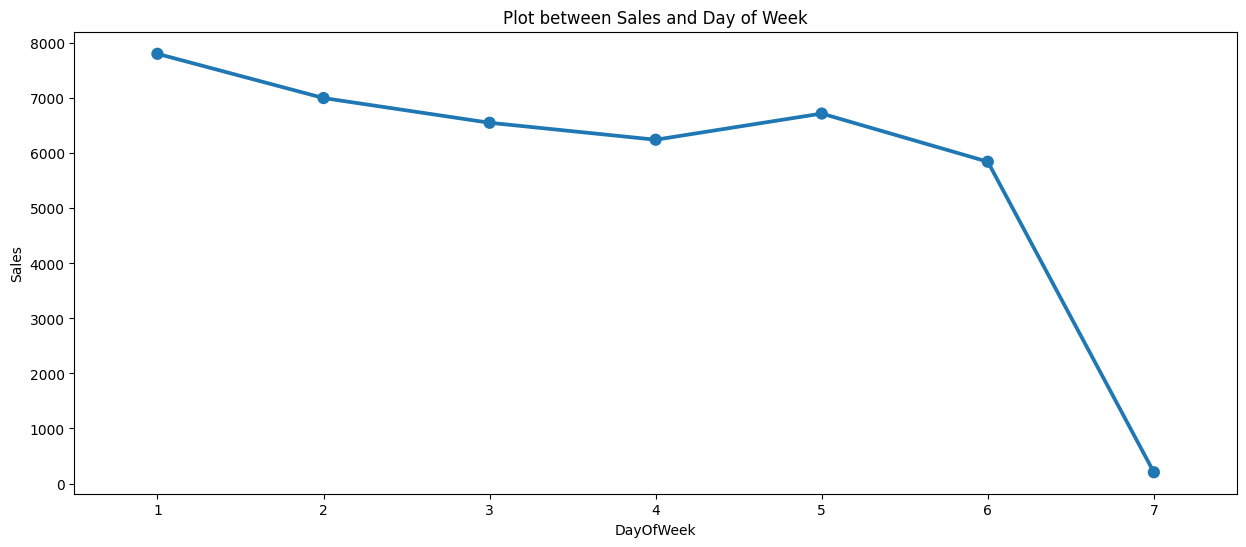

In [36]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=data_new)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

#### Chart - 3 Barplot

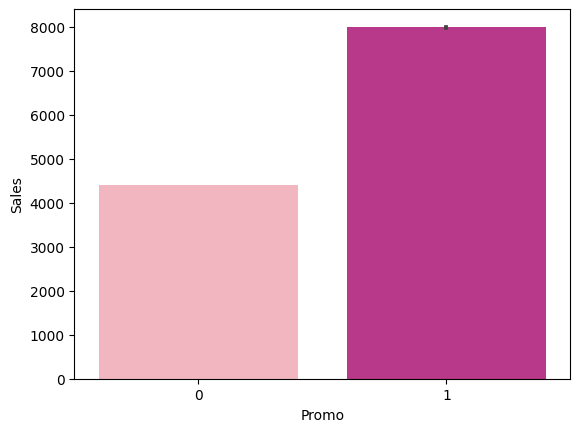

In [37]:
# Chart - 3 visualization code
promo_sales = sns.barplot(x="Promo", y="Sales", data=data_new, palette='RdPu')


Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

### Chart - 4 Lets vizualize the data according to store type

In [38]:
data_new["Avg_Customer_Sales"] = data_new.Sales/data_new.Customers

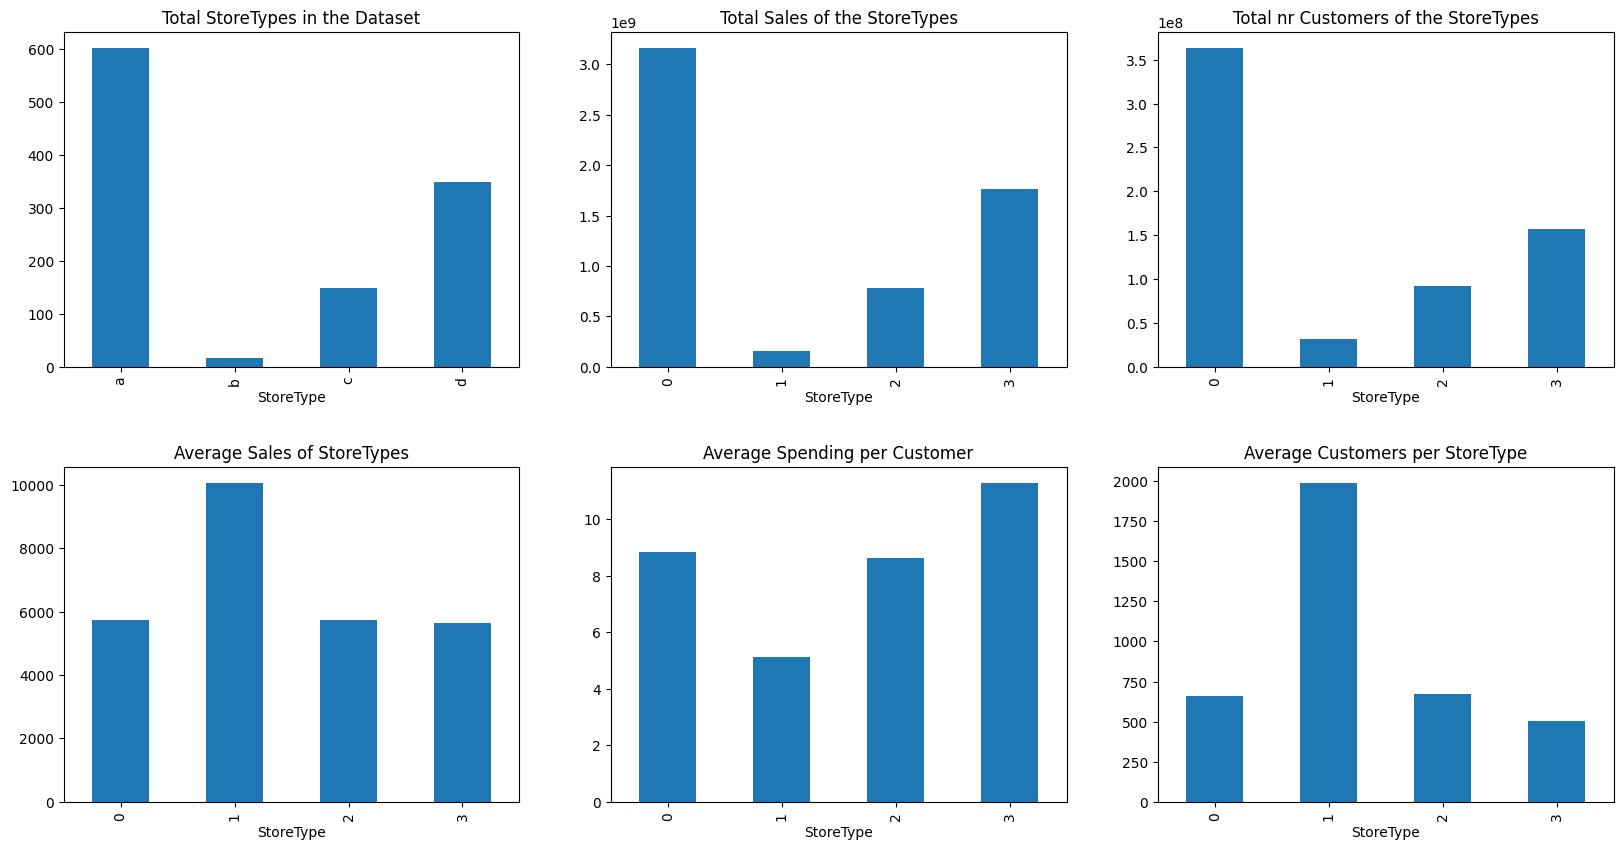

In [39]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
data_new.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
data_new.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
data_new.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
data_new.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
data_new.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers

### Insights Drawn from EDA and Graph Analysis

- There are two datasets - 1) Rossmann.csv & 2) Store.csv
- shape of Rossmann dataset = (1017209,8) shape of store dataset = (1115, 10)
- In both dataset 'Store' column is common. So we do inner join on the basis of column 'Store'.
- On looking on datasets we find lots of Nan values in Store dataset.
Try to replace Nan values with suitable values. In CompetitionDistance column only 3 Nan values are there. So we replaced it with median.
Now for rest columns(CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, romointerval) there are lots of Nan values and best way to treat this values to replace with 0.
- After combining shape of final dataset = (1017209,18)
- Also there is some columns such as 'StateHoliday', 'SchoolHoliday' & 'Assortment' which contains object values. So, try to change into int by giving suitable values
- From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.
- From plot Sales and day of week, Sales highest on Monday and start declinig from tuesday to saturday and on Sunday Sales almost near to Zero. This is because on Sunday all stores be closed.
- Plot between promotion and Sales shows that promotion helps in increasing Sales. This similar trends also shows with customers.

#### Chart - 5 Pie-Chart

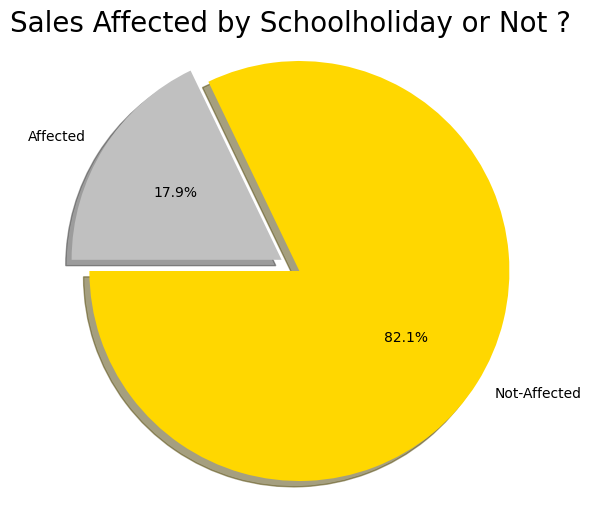

In [40]:
# Chart - 4 visualization code
labels = 'Not-Affected' , 'Affected'
sizes = data_new.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data

##### 2. What is/are the insight(s) found from the chart?

As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday

#### Chart - 5  Pie Chart

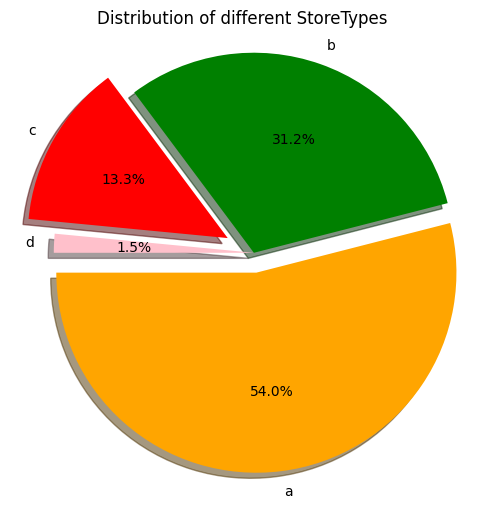

In [41]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

The store type 'a' is large in number which means the majority of stores are of type 'a' , while there are less stores of type 'd'.

#### Chart - 6 Cat plot

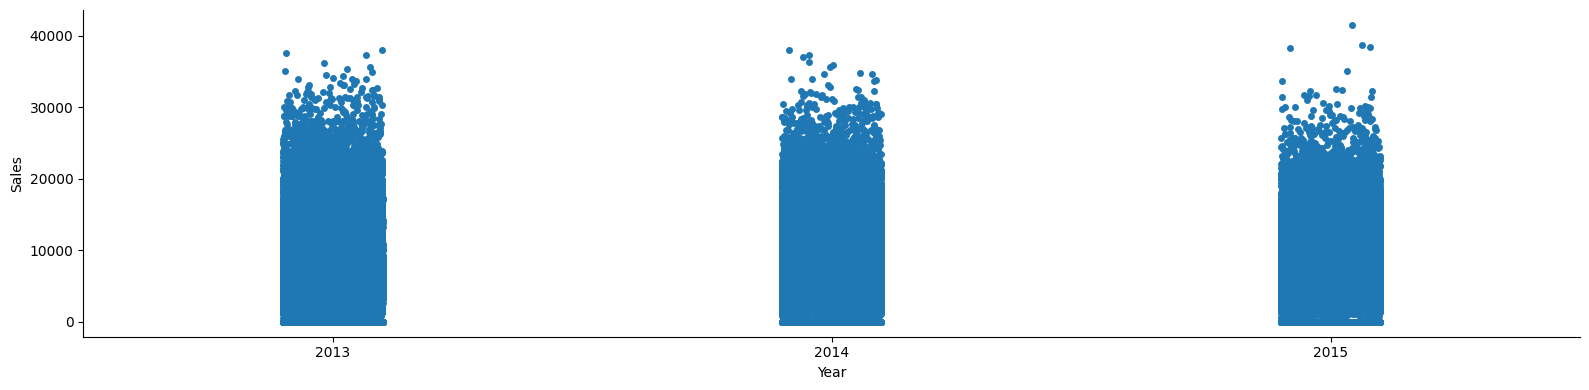

In [42]:
# Chart - 7 visualization code
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=data_new, height=4, aspect=4 );

As per the above graph there is no significant difference in sales as far as year is concerned

#### Chart - 7 Bar plot

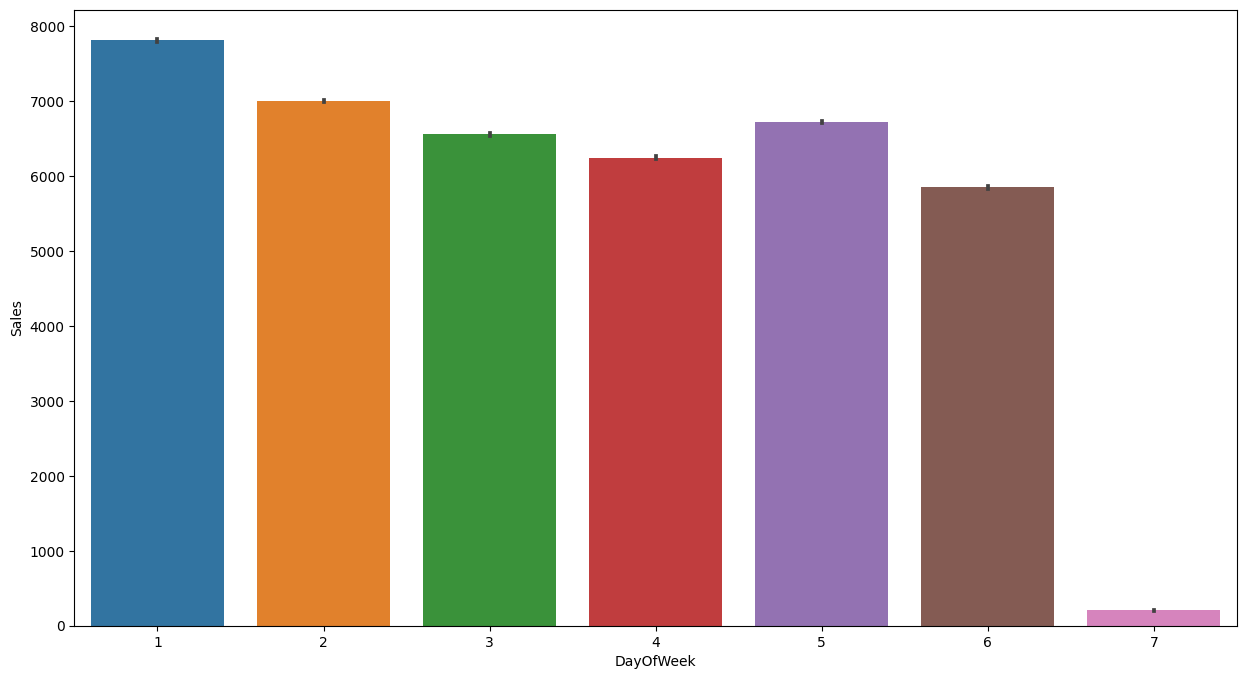

In [43]:
# Chart - 8 visualization code
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=data_new);

##### 2. What is/are the insight(s) found from the chart?

From plot it can be sen that most of the sales have been on 1st and last day of week

#### Chart - 9 Coorelation Heatmap

<ipython-input-44-1cbac6d728cd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_new.corr()


<Axes: >

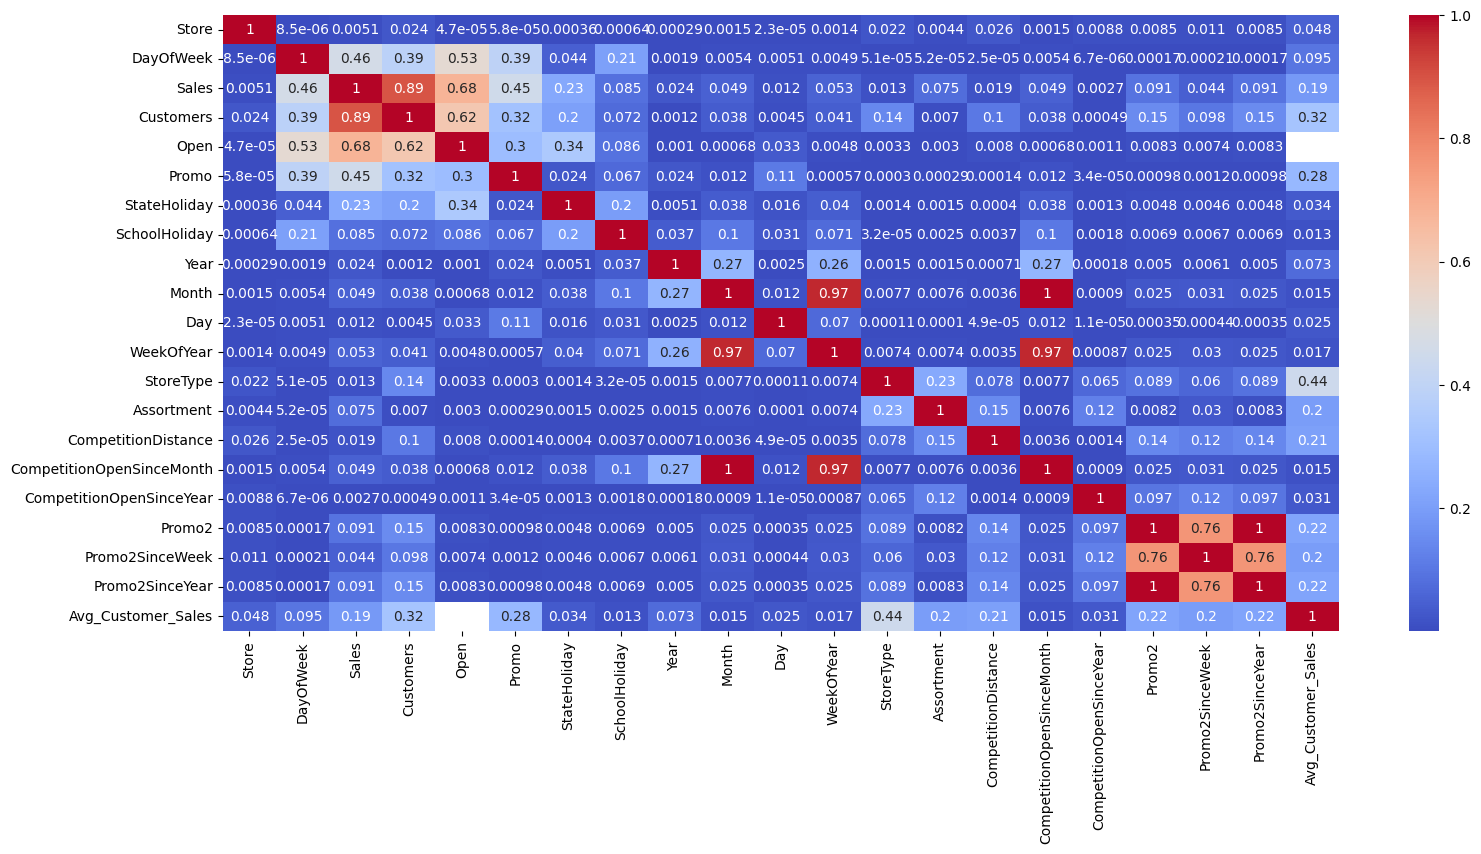

In [44]:
# Chart - 9 visualization code
 ## Correlation
plt.figure(figsize=(18,8))
correlation = data_new.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Seaborn is a Python library that is based on matplotlib and is used for data visualization. It provides a medium to present data in a statistical graph format as an informative and attractive medium to impart some information. A heatmap is one of the components supported by seaborn where variation in related data is portrayed using a color palette.

##### 2. What is/are the insight(s) found from the chart?

There are some features such as customers and sales which are highly corelated and some features less corelated which can be understood from the colour palette.

## ***5. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [48]:
data_new.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'Avg_Customer_Sales'],
      dtype='object')

<Axes: >

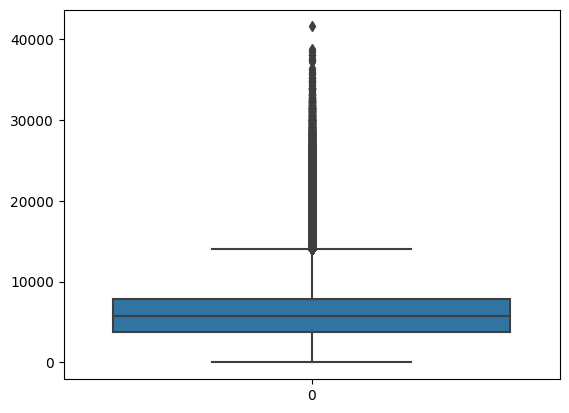

In [49]:
# Handling Outliers & Outlier treatments
sns.boxplot(data_new['Sales'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

*Here we will be using Inter quartile range(IQR) to remove Outliers

In [50]:
data_new.shape

(1017209, 23)

In [51]:
#removing outliers
def remove_outlier(data_new, col_name):
    q1 = data_new[col_name].quantile(0.25)
    q3 = data_new[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = data_new.loc[(data_new[col_name] > fence_low) & (data_new[col_name] < fence_high)]
    return df_out

In [52]:
# defining new variable after removing outliers
df = remove_outlier(data_new, 'Sales')

In [53]:
df.shape

(990515, 23)

In [54]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Customer_Sales
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,2,0,1270,7,2008,0,0,0,0,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,2,2,620,7,2009,0,0,0,0,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,0,0,29910,7,2015,0,0,0,0,8.626118


In [56]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [57]:
# Open variable has all repeated data hence lets drop it since it will led to data redundency
df = df.drop('Open', axis=1)

In [58]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Customer_Sales
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,...,2,0,1270,7,2008,0,0,0,0,9.482883
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,...,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,...,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,...,2,2,620,7,2009,0,0,0,0,9.342457
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,...,0,0,29910,7,2015,0,0,0,0,8.626118


### Feature Selection
There are many ways of doing feature selection for the model, here we are considering Multicollinearity for the same

#### Lets check for multicollenearity of variables

In [62]:
#We created this variable for analysis purpose and this variable is not required furthur
x = df.drop(['Avg_Customer_Sales'],axis=1,inplace=True)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [64]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Store,3.995420e+00
1,DayOfWeek,5.838834e+00
2,Customers,7.403350e+00
3,Promo,2.037366e+00
4,StateHoliday,1.002613e+00
5,SchoolHoliday,1.307257e+00
6,Year,3.264906e+01
7,Month,inf
8,Day,4.609504e+00
9,WeekOfYear,5.068653e+01


Multicolinearity of columns like 'Promo2SinceYear' and 'Promo2' is pretty high so we decided to drop it



In [65]:
df.drop(['Promo2','Promo2SinceYear'],axis=1,inplace=True)

In [66]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,2,0,1270,7,2008,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,0,0,570,7,2007,13,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,0,0,14130,7,2006,14,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,2,2,620,7,2009,0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,0,0,29910,7,2015,0,0


In [67]:
## Also drop some columns which were just created for vizualizing the data in a better way, and are not required furthur in model building
df.drop(['WeekOfYear','Day','Year','Month'],axis=1,inplace=True)

###  Feature Engineering

 Categorical Encoding

In [68]:
# Encode your categorical columns
new_df = pd.get_dummies(df, columns=['PromoInterval'])

In [69]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,0,1,2,0,1270,7,2008,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,0,1,0,0,570,7,2007,13,0,0,1,0
2,3,5,2015-07-31,8314,821,1,0,1,0,0,14130,7,2006,14,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,0,1,2,2,620,7,2009,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,0,1,0,0,29910,7,2015,0,1,0,0,0


In [70]:
new_df.shape

(817698, 18)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The machine learning model works well with numeric data. So the categorical features has to be converted into numeric depending upon the type of data. If the data is ordinal then label encoding is done and if the data is nominal then we use Onehot Encoding Technique

### ***6 ML Model Implementation***

In [71]:
# Importing all the essential libraries
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

### ML Model - 1 Linear Regression

In [72]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = new_df.columns.drop(['Store','Date','Sales'])

In [73]:
# Create the data of independent variables
U = new_df[indep_var].values

# Create the dependent variable data
v = new_df[dep_var].values

#### Splitting the data for training and testing

In [74]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.25, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(613273, 15)
(204425, 15)


In [75]:
# scaling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [76]:
# fitting the data into Linear Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [77]:
v_pred=linear_regression.predict(U_test)
v_pred

array([7379.57673041, 6689.26423041, 3108.63923041, ..., 3656.60798041,
       8858.48298041, 8400.63923041])

In [78]:
linear_regression.score(U_train, v_train)


0.7097058572671026

In [79]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,5570,7379.57673
1,6685,6689.26423
2,3472,3108.63923
3,3178,3063.79548
4,5513,7297.23298
...,...,...
204420,5513,5010.85798
204421,2669,2967.67048
204422,3010,3656.60798
204423,10204,8858.48298


In [80]:
sales_mean=new_df[dep_var].mean()

In [81]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1773181.6614619677
RMSE : 1331.6086742966072
RMPSE : 0.20112900943857095
R2 : 0.707606282168786


### Ridge Regression

In [82]:
ridge = Ridge(alpha = 0.5)
ridge.fit(U_train, v_train)
v_pred_rid=ridge.predict(U_test)
ridge.score(U_test, v_test)

0.7076070883314627

In [83]:
MSE  = mean_squared_error(v_test, v_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rid)
print("R2 :" ,r2)

MSE : 1773176.7725988103
RMSE : 1331.6068385971928
RMPSE : 0.20112873217062283
R2 : 0.7076070883314627


### Lasso Regression

In [84]:
lasso = Lasso(alpha = 2.0)
lasso.fit(U_train, v_train)
v_pred_lasso = lasso.predict(U_test)
lasso.score(U_train, v_train)

0.7096954488913731

### Implementing KKN Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(11)
clf.fit(U_train,v_train)

KNeighborsRegressor(n_neighbors=11)

In [86]:
y_pred = clf.predict(U_test)
KNN_MSE = mean_squared_error(v_test,y_pred)
KNN_MSE

726511.0497060393

In [87]:
KNN_RMSE = np.sqrt(KNN_MSE)
KNN_RMSE

852.3561753786026

## Decesion Tree

In [88]:
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE_DT = np.sqrt(MSE)
print("RMSE_DT :" ,RMSE)

RMPSE=RMSE_DT/sales_mean
print("RMPS_DT :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1460290.5205616008
RMSE_DT : 1331.6068385971928
RMPS_DT : 0.18252305623718537
R2 : 0.7592013363883734


## Hyperparameter Tuning Decesion Tree
There are different ML models. They all are different in some or the other way, so what makes them different is nothing but the input parameters for the model.
These input parameters are called hyperparameters. These hyperparameters will define the core architechture of the model.Here the model explores different with different values of parameters and select the best in order to get the best result.


In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, U_train.shape[1]],
    }

clf = RandomizedSearchCV(DecisionTreeRegressor(random_state=3), parameter_space,
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(U_train, v_train)
print("Best parameters:")
print(clf.best_params_)

In [91]:
from scipy import stats
from sklearn.metrics import accuracy_score
from numpy import sqrt
dt_model = DecisionTreeRegressor(**clf.best_params_)
dt_model.fit(U_train, v_train)
dt_ypred = dt_model.predict(U_test)
dt_mse = mean_squared_error(v_test, dt_ypred)
dt_rmse = sqrt(dt_mse)
print('Mean_Squared_Error:',dt_mse)
print('Root_Mean_Squared_Error',dt_rmse)

Mean_Squared_Error: 303181.1864502505
Root_Mean_Squared_Error 550.6189121799673


In [92]:
import sklearn.metrics as metrics
r_sq = metrics.r2_score(v_test,dt_ypred)
print("R_Sq associated with Decision tree regressor is:",r_sq )

R_Sq associated with Decision tree regressor is: 0.9500060957039349


### Random Forest


In [93]:
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(U_train, v_train)
v_pred_rf=random_forest.predict(U_test)
MSE  = mean_squared_error(v_test, v_pred_rf)
print("MSE :" , MSE)

RMSE_RF = np.sqrt(MSE)
print("RMSE :" ,RMSE_RF)

RMPSE=RMSE_RF/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rf)
print("R2 :" ,r2)

MSE : 995275.6144967789
RMSE : 997.6350106611029
RMPSE : 0.1506849161834249
R2 : 0.8358812616246419


### Hyperparameter tuning Random forest

In [94]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to be considered at every split
max_features = ['auto','srqt']
# Max number of levels in tree
max_depth = [2,4]
# Minimum number of samples required in node split
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True,False]

In [95]:
# Create a parm grid
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'srqt'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:

rf_ran_cv = RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid, cv = 5 , verbose = 2, n_jobs=4)
rf_ran_cv.fit(U_train,v_train)

In [100]:
 rf_ran_cv.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': True}

In [98]:
rf_model = RandomForestRegressor(**rf_ran_cv.best_params_)
rf_model.fit(U_train, v_train)
rf_ypred = dt_model.predict(U_test)
rf_mse = mean_squared_error(v_test, rf_ypred)
RMSE_RF = sqrt(rf_mse)
print('Mean_Squared_Error:',rf_mse)
print('Root_Mean_Squared_Error',RMSE_RF)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean_Squared_Error: 303181.1864502505
Root_Mean_Squared_Error 550.6189121799673


### Model Evaluation

In [99]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','Decision Tree',
                    'Random Forest','KNN'], 'RMSE': [RMSE,RMSE_DT,
                    RMSE_RF,KNN_RMSE]})
model_ev

,Model,RMSE
0,Linear Regression,1331.606839
1,Decision Tree,1208.424810
2,Random Forest,550.618912
3,KNN,852.356175


# **Conclusion**

Finally from the above dataframe we conclude that Random Forest Algorithm outperforms all the alogorithm with the least error RMSE.